# Stats

This notebook loads some data, reports some simple descriptive statistics (means, standard deviations etc) and shows a number of useful plots (scatter plots, histograms, time series plots).

Most of the descriptive stats use built-in Julia commands. The plots rely on the Plots package and the pdf and quantiles are from the Distributions package (see https://github.com/JuliaStats/Distributions.jl).

## Load Packages

In [1]:
using Distributions            #distributions, random numbers, etc.

using Compat, Missings                 #in Julia 0.6 
#using Dates, DelimitedFiles, Random, LinearAlgebra   #in Julia 0.7
                         
include("printmat.jl")   #just a function for prettier matrix printing

printlnPs (generic function with 2 methods)

In [2]:
using Plots

backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(600,400))
else    
    gr(size=(600,400))
end

Plots.GRBackend()

# Load Data from a csv File

The following is a portion of MyData.csv:

```
date,Mkt-RF,RF,SmallGrowth
197901,4.18,0.77,10.96
197902,-3.41,0.73,-2.09
197903,5.75,0.81,11.71
197904,0.05,0.8,3.27
```

In [3]:
x = readdlm("Data/MyData.csv",',',skipstart=1)  #reading the csv file    
                                                #skip 1st line
println("\nfirst four lines of x:") 
printmat(x[1:4,:])


first four lines of x:
197901.000     4.180     0.770    10.960
197902.000    -3.410     0.730    -2.090
197903.000     5.750     0.810    11.710
197904.000     0.050     0.800     3.270



### Creating Variables

In [4]:
ym  = round.(Int,x[:,1])        #yearmonth, like 200712
(Rme,Rf,R) = (x[:,2],x[:,3],x[:,4])  #creating variables from columns of x
Re  = R - Rf                         #do R .- Rf if R has several columns

println("first 4 obs of Rme and Re")
printmat([Rme[1:4,:] Re[1:4,:]])

dN = Date.(string.(ym),"yyyymm") #convert to string and then to Julia Date
printmat(dN[1:4])

first 4 obs of Rme and Re
     4.180    10.190
    -3.410    -2.820
     5.750    10.900
     0.050     2.470

1979-01-01
1979-02-01
1979-03-01
1979-04-01



# Some Descriptive Statistics

## Means and Standard Deviations

The next few cells estimate means, standard deviations, covariances and correlations of the variables `Rme` (US equity market excess return) and `Re` (excess returns for a segment of the market, small growth firms). 

In [5]:
μ = Compat.mean([Rme Re],dims=1)    #,dims=1 to calculate average along a column, 0.7 syntax
σ = Compat.std([Rme Re],dims=1)     #do \sigma[Tab] to get σ


println("            Rme       Re")
printlnPs("means: ",μ)  #for more stat functions, see the package StatsBase.jl
printlnPs("std:   ",σ)

            Rme       Re
means:      0.602     0.303
std:        4.604     8.572


## Covariances and Correlations

In [6]:
println("\n","cov([Rme Re]): ")          
printmat(cov([Rme Re]))

println("\n","cor([Rme Re]): ")          
printmat(cor([Rme Re]))


cov([Rme Re]): 
    21.197    28.426
    28.426    73.475


cor([Rme Re]): 
     1.000     0.720
     0.720     1.000



## OLS

A linear regression
$
y = x'b + u
$,
where $x=[1;R^e_m]$.

Clearly, the first element of $b$ is the intercept and the second element is the slope coefficient.

The GLM package (not used here) has powerful regression methods. See https://github.com/JuliaStats/GLM.jl.

In [7]:
c   = ones(size(Rme,1))         #a vector with ones, no. rows from variable
x   = [c Rme]                   #x is a Tx2 matrix
y   = copy(Re)                  #to get standard OLS notation

b2   = inv(x'x)*x'y             #OLS according to a textbook
b  = x\y                        #also OLS, quicker and numerically more stable
u   = y - x*b                   #OLS residuals
R2a = 1 - var(u)/var(y)         #R2, but that name is already taken

Covb  = inv(x'x)*var(u)         #covariance matrix of b estimates
Stdb  = sqrt.(diag(Covb))       #std of b estimates
tstat = (b .- 0)./Stdb          #t-stats, replace 0 with your null hypothesis 

println("OLS coefficients, regressing Re on constant and Rme, different calculations")
printmat([b b2])                
printlnPs("R2: ",R2a) 
printlnPs("no. of observations: ",size(Re,1))

println("\ncoeffs and t-stats")
printmat([b tstat])

OLS coefficients, regressing Re on constant and Rme, different calculations
    -0.504    -0.504
     1.341     1.341

R2:      0.519
no. of observations:        388

coeffs and t-stats
    -0.504    -1.656
     1.341    20.427



# Drawing Random Numbers and Finding Critical Values

## Random Numbers: Independent Variables

In [8]:
T = 100
x = randn(T,2)    #T x 2 matrix, N(0,1) distribution

println("\n","mean and std of random draws: ")
μ = Compat.mean(x,dims=1)         #0.7 syntax                 
σ = Compat.std(x,dims=1)
printmat([μ;σ])

println("covariance and correlation matrices:")
printmat(cov(x))
printmat(cor(x))


mean and std of random draws: 
     0.050     0.180
     0.972     1.070

covariance and correlation matrices:
     0.945    -0.088
    -0.088     1.144

     1.000    -0.085
    -0.085     1.000



## Random Numbers: Correlated Variables

In [9]:
μ = [-1,10]
Σ = [1 0.5;
     0.5 2]

T = 100
x = rand(MvNormal(μ,Σ),T)'  #random numbers, T x 2, drawn from bivariate N(μ,Σ)

println("\n","mean and std of random draws: ")
μ = Compat.mean(x,dims=1)             #0.7 syntax
σ = Compat.std(x,dims=1)
printmat([μ;σ])

println("covariance and correlation matrices:")
printmat(cov(x))
printmat(cor(x))


mean and std of random draws: 
    -0.951     9.921
     1.090     1.169

covariance and correlation matrices:
     1.188     0.551
     0.551     1.367

     1.000     0.433
     0.433     1.000



## Quantiles ("critical values") of Distributions

In [10]:
N05     = quantile(Normal(0,1),0.05)            #from the Distributions package
Chisq05 = quantile(Chisq(5),0.95)

println("\n","5th percentile of N(0,1) and 95th of Chisquare(5)")      #lots of statistics functions
printmat([N05 Chisq05])


5th percentile of N(0,1) and 95th of Chisquare(5)
    -1.645    11.070



# Statistical Plots

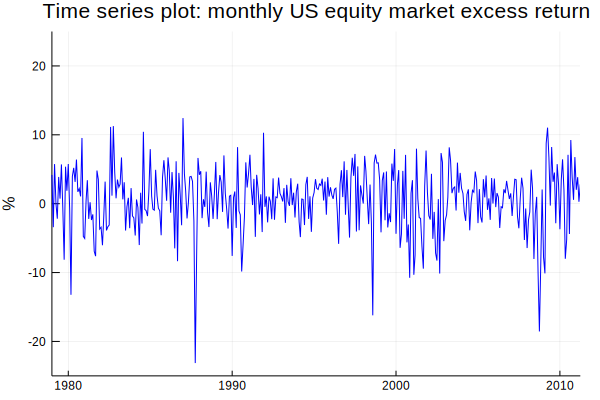

In [11]:
xTicksLoc = Dates.value.([Date(1980);Date(1990);Date(2000);Date(2010)])
xTicksLab = ["1980";"1990";"2000";"2010"]   #crude way of getting the tick marks right

plot3a = plot(dN,Rme,color=:blue,legend=false,xticks=(xTicksLoc,xTicksLab))
plot!(ylim=(-25,25))
title!("Time series plot: monthly US equity market excess return")
ylabel!("%")

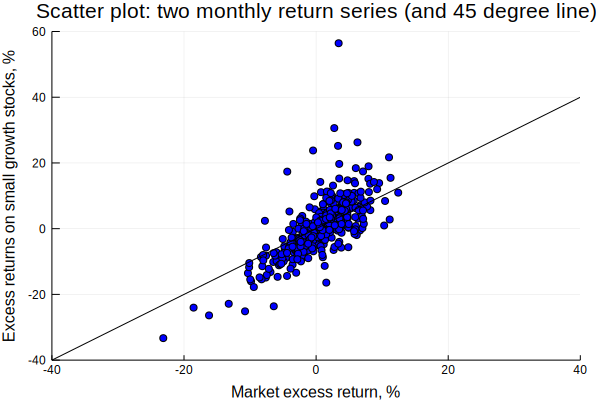

In [12]:
plot3b = scatter(Rme,Re,color=:blue,legend=false)
plot!([-40;60],[-40;60],color=:black)
plot!(xlim=(-40,40),ylim=(-40,60))
title!("Scatter plot: two monthly return series (and 45 degree line)")
xlabel!("Market excess return, %")
ylabel!("Excess returns on small growth stocks, %")

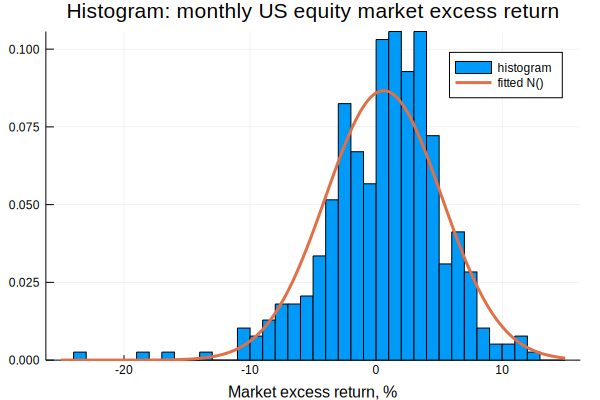

In [13]:
xGrid = -25:0.1:15
pdfX  = pdf.(Normal(mean(Rme),std(Rme)),xGrid) #the N(μ,σ) pdf
                                        #"Distributions" wants σ, not σ^2

histogram(Rme,bins = -25:1:15,normalized=true,label="histogram")     #normalized to have area=1
plot!(xGrid,pdfX,linewidth=3,label="fitted N()")
title!("Histogram: monthly US equity market excess return")
xlabel!("Market excess return, %")
ylabel!("")

In [14]:
println("\n","end of program")


end of program
